# Compartmental model of a skeletal muscle

## Main reference: <a href="https://www.sciencedirect.com/science/article/pii/S0022519321000783#!"> Senneff and Lowrey, <em>Journal of Theoretical Biology </em>, 2020 </a>

### I. Sarcolemma Model

$$C_m \frac{dV_m}{dt} = -I_{ionic} + I_{input}$$

#### 1. Ionic currents
---
$$I_{ionic} = I_{Na} + I_{KDR} + I_{Cl} + I_{KIR} + I_{NaK}$$

##### 1. Sodium Current

$$I_{Na} = \bar{g}_{Na} \cdot m^3 \cdot h \cdot S \cdot (V_m - E_{Na})$$<br>
$$\frac{dS}{dt} = \frac{S_\infty - S}{\tau_S}$$ <br>
$$S_\infty = \frac{1}{1 + e^{\frac{V_m - V^\infty_S}{A^\infty_S}}}$$ <br>
$$\tau_S = \frac{60}{0.2 + 5.65 \Big(\frac{V_m + V_\tau}{100}\Big)}$$ <br>
$$\frac{dm}{dt} = \frac{\bar{\alpha}_m (V - V_m)}{1 - e^{-\frac{V - V_m}{K_{\alpha_{m}}}}} (1 - m) - \bar{\beta}_m e^{-\frac{V - V_{\beta_m}}{K_{\beta_m}}}m$$ <br>
$$\frac{dh}{dt} = \bar{\alpha}_h e^{-\frac{V - V_{\alpha_h}}{K_{\alpha_h}}} (1 - h) - \frac{\bar{\beta}_h}{1 - e^{-\frac{V - V_h}{K_{\alpha_{m}}}}}h$$


##### 2. Potassium current

$$I_{K} = \bar{g}_K \cdot n^4 \cdot h_K \cdot (V_m - E_K)$$ <br>
$$\frac{dh_K}{dt} = \frac{h_K^\infty - h_K}{\tau_{h_K}}$$ <br>
$$h_K^\infty = \frac{1}{1 + e^{\frac{V_m - V_{h_K}^\infty}{A_{h_K}^\infty}}}$$ <br>
$$\tau_{h_K} = \exp\Big(-(V_m + 40)/25.75\Big)$$


##### 3. Chloride Current
$$I_{Cl} = \bar{g}_{Cl} \cdot A^4 \cdot \Big(V_m - E_{Cl}\Big)$$ <br>
$$A = \frac{1}{1 + e^{\frac{V_m - V_a}{A_a}}}$$ <br>

##### 4. L-VGCC (DHPR)

$$I_{Ca} = \bar{g}_{Ca} \Big(\sum_{i=0}^4 O_i\Big) \cdot f \cdot (V_m - E_{Ca})$$ <br>

$$k_c = 0.5\alpha_1 (e^{(V - \bar{V})/8K})$$
$$k_{cm} = 0.5\alpha_1 (e^{-(V - \bar{V}/8K)})$$

###### Allosteric activation
$$\frac{df}{dt} = \frac{f_{\infty} - f}{\tau_f}$$
$$f_{\infty} = \frac{1}{1 + [Ca^{2+}]_x}$$ <br>
$$\tau_f = \frac{1}{\alpha_f (1 + [Ca^{2+}]_x/K_f)}$$ <br>



##### Parameters for ion currents
---
Note: for initial simulations all the parameters correspond to the "Fast Twitch (FT)" muscles.

|Parameter|Unit|Definition|Value|Reference|
|:---------|:----|:----------|:-----|:-----|
|$$C_m$$| $$\mu Fcm^{-2}$$| Membrane capacitance| $$1$$ | Senneff|
|$$\bar{g}_{Na}$$| $$mScm^{-2}$$ | Maximum conductance of sodium channel|$$804$$|Senneff|
|$$\bar{g}_{K}$$ | $$mScm^{-2}$$ | Maximum conductance of potassium channel|$$64.8$$|Senneff|
|$$\bar{g}_{Cl}$$ | $$mScm^{-2}$$ | Maximum conductance of chloride channel|$$19.65$$|Senneff|
|$$G_K$$|  $$mScm^{-2}$$ |Maximum conductance of chloride channel|$$11.1$$|Senneff|
|$$\bar{J}_{NaK}$$|$$\frac{\mu \cdot mol}{cm^2 s}$$| Maximum conductance of Na-K Pump| $$6.21 \times 10^{-4}$$| Senneff|
|$$\alpha_m$$|$$\frac{1}{ms \cdot mV}$$| Maximum forward rate constant for $m$| $$0.288$$| Senneff|
|$$\beta_m$$|$$\frac{1}{ms}$$|Maximum backward rate constant for $m$|$$1.38$$|Senneff|
|$$\alpha_h$$|$$\frac{1}{ms \cdot mV}$$| Maximum forward rate constant for $h$| $$0.0081$$| Senneff|
|$$\beta_h$$|$$\frac{1}{ms}$$|Maximum backward rate constant for $m$|$$4.38$$|Senneff|
|$$\alpha_n$$|$$\frac{1}{ms \cdot mV}$$| Maximum forward rate constant for $n$| $$0.0131$$| Senneff|
|$$\beta_h$$|$$\frac{1}{ms}$$|Maximum backward rate constant for $m$|$$4.38$$|Senneff|
|$$V^m_{0.5}$$|$$\frac{1}{ms \cdot mV}$$|Half-maximal voltage for $m$|$$-46$$|Senneff|
|$$K_{\alpha_m}$$|$$\frac{1}{ms}$$|Steepness factor for $m$|$$10$$|Senneff|
|$$K_{\beta_m}$$|$$\frac{1}{ms}$$|Slope factor for $m$|$$18$$|Senneff|
|$$V_h$$|$$\frac{1}{ms}$$|Half maximal voltage for $h$|$$-45$$|Senneff|
|$$K_{\alpha_h}$$|$$\frac{1}{ms}$$|Steepness factor for $h$|$$14.7$$|Senneff|
|$$K_{\beta_h}$$|$$\frac{1}{ms}$$|Slope factor for $h$|$$9$$|Senneff|
|$$V^\infty_S$$|$$mV$$|Half maximal voltage for $S$|$$-78$$|Senneff|
|$$V_\tau$$|$$mV$$|Half maximal voltage for $S$|$$90$$|Senneff|
|$$A^\infty_S$$|$$mV$$|Steepness factor for $S$|$$5.8$$|Senneff|
|$$V_n$$|$$mV$$|Half maximal voltage for $n$|$$-40$$|Senneff|
|$$K_{\alpha_n}$$|$$mV$$|Steepness factor for $n$|$$7$$|Senneff|
|$$K_{\beta_n}$$|$$mV$$|Slope factor for $n$|$$40$$|Senneff|
|$$V_a$$|$$mV$$|Half-maximal voltage for $a$|$$70$$|Senneff|
|$$A_a$$|$$mV$$|Steepness factor for $a$|$$150$$|Senneff|
|$$E_{Na}$$|$$mV$$|Sodium channel Nernst Potential|$$59.3$$|Wallinga|
|$$E_{K}$$|$$mV$$|Potassium channel Nernst potential|$$-81.8$$|Wallinga|
|$$E_{Cl}$$|$$mV$$|Chloride channel Nernst potential|$$-78.3$$|Wallinga|


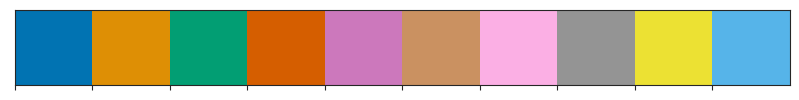

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from scipy.integrate import solve_ivp, odeint
from scipy.signal import square
from scipy.interpolate import interp1d
from skeletal_muscle_pulse_eps import *
import os

sns.set_style("ticks")
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["figure.dpi"] = 100
plt.rcParams["font.family"] = "sans serif"
qcolors = ["#C6D57E", "#D57E7E", "#A2CDCD", "#FFE1AF"]
#qPal = sns.color_palette(sns.set_palette(qcolors))
qPal = sns.color_palette(sns.set_palette("colorblind"))
sns.palplot(qPal)

In [778]:
class Skeletal_muscle:
    """ This class contains the parameters and equations describing dynamics of a skeletal muscle. The class is broken into following parts:
    1. Sarcolemma Model: - Contains ionic currents modeled with Hodgkin-Huxley-like conductance based equations. (UNDER CONSTRUCTION)
    2. Transverse tubule (T-tubule) Model: - Containts the T-tubule ion channels and voltage-gated calcium channels. (UNDER CONSTRUCTION)
    3. Sarcoplasmic Reticulum: - Consists of ryanodine receptors, IP3 receptors and SERCA Pumps. (UNDER CONSTRUCTION)
    4. Mitochondria (UNDER CONSTRUCTION)
    """
    
#     ########################################## Initialization (Under Construction) #################################
#     def __init__(i_step):
#         """This function is used to initialize model parameters and input patterns. For the first iteration of the code, thi"""
    ########################################## defining constants ##################################################
    
    ########### Electrical Parameters
    Cm = 1.                          # μFcm^-2; membrane capacitance
    
    ########### 1. Sodium conductance/channel
    g_max_Na = 804                   # mS.cm^-2; peak sodium conductance
    E_Na = 59.3                      # mV; Sodium channel Nernst Potential
    α_max_m = 0.288                  # (ms.mV)^-1; Maximum forward rate constant for m
    β_max_m = 1.38                   # ms^-1; Maximum backward rate constant for m
    α_max_h = 0.0081                 # ms^-1; Maximum forward rate constant for h
    β_max_h = 0.067                  # ms^-1; Maximum backward rate constant for h
    V_half_m = -46                   # mV; Half-maximum voltage for m
    K_alpha_m = 10                   # ms^-1; Steepness factor for m
    K_beta_m = 18                    # ms^-1: Slope factor for m
    V_half_h = -45                   # mV; Half-maximum voltage for h
    K_alpha_h = 14.7                 # (ms.mV)^-1; Steepness factor for h
    K_beta_h = 9                     # ms^-1; Slope factor for h
    V_half_S = -78                   # mV; Half-maximal voltage for S
    A_S = 5.8                        # mV; Steepness factorfor S
    V_tau = 90                       # Half-maximum voltage for τ_s
    
    ########## 2. Potassium conductance/channel
    g_max_K = 64.8                   # mS.cm^-2; peak potassium conductance
    E_K = -81.8                      # mV; Potassium channel Nernst Potential
    α_max_n = 0.0131                 # (ms.mV)^-1; Maximum forward rate constant for n
    β_max_n = 0.067                  # ms^-1; Maximum backward rate constant for n
    V_half_n = -40                   # mV; Half-maximum voltage for n
    K_alpha_n = 7                    # mV; steepness factor for n
    K_beta_n = 40                    # mV; Slope factor for n
    V_half_hk = -40                  # mV; Half-maximum voltage for hk
    A_hk = 7.5                       # mV; Steepness factor for hk
    
    ######### 3. Chloride conductance/channel
    g_max_Cl = 19.65                 # mS.cm^-2; Maximum conductance of Cl- channel
    E_Cl = -78.3                     # mV; Potassium channel Nernst Potential
    V_half_a = 70                    # mV; Half-maximum voltage for a
    A_a = 150                        # mV; Steepness factor for a
    
    
    
    
    ##################################### Functions ##############################################################
    def na_gating_vars(self, V):
        """This function takes the membrane voltage as input and returns α_m, β_m, α_h and β_h. Functions taken from Senneff and Lowrey 2020."""
    
        a_m = (self.α_max_m*(V - self.V_half_m))/(1 - np.exp((-(V - self.V_half_m))/(self.K_alpha_m)))
        b_m = self.β_max_m*np.exp(-(V - self.V_half_m)/(self.K_beta_m))
        a_h = self.α_max_h*np.exp(-(V - self.V_half_h)/(self.K_beta_h))
        b_h = (self.β_max_h)/(1 + np.exp(-(V - self.V_half_h)/(self.K_beta_h)))
        
        return a_m, b_m, a_h, b_h
    
    def na_slow_inactivation_vars(self, V):
        """This function takes membrane voltage as input and returns S_inf and τ_S variables of the sodium channel slow inactivation."""

        S_inf = 1/(1 + np.exp((V - self.V_half_S)/(self.A_S)))
        tau_S = (60)/(0.2 + 5.56*(np.power((V + self.V_tau), 2)/(100)))

        return S_inf, tau_S
    
    def k_gating_vars(self, V):
        """This function takes membrane voltage as input and returns α_n and β_n (Potassium gating variables). Functions taken from Senneff and Lowrey 2020."""
        a_n = (self.α_max_n*(V - self.V_half_n))/(1 - np.exp(-(V - self.V_half_n)/(self.K_alpha_n)))
        b_n = self.β_max_n*np.exp(-(V - self.V_half_n)/(self.K_beta_n))
        
        return a_n, b_n
    
    def h_K_inf(self, V):
        """This function takes membrane voltage V as input and returns h_K_inf parameter for slow K channel inactivation. Functions taken from Senneff and Lowrey 2020."""
        return 1/(1 + np.exp((V - self.V_half_hk)/(self.A_hk)))
    
    def tau_h_K(self, V):
        """This function takes membrane voltage V as input and returns the time constant τ_hK for K-channel slow inactivation"""
        return np.exp(-(V + 40)/25.75)
    
    def A_boltzmann(self, V):
        """This function takes membrane voltage V as input and returns the Boltzmann-function for activation of Cl- channel"""
        return 1/(1 + np.exp((V - self.V_half_a)/(self.A_a)))
    
    def I_Na(self, V, m, h, S):
        """Sodium current. Inputs: membrane potential (V) (in mV), activation variable (m), inactivation variable (h), slow-inactivation (S)
        Output: magnitude of sodium current (μA)"""
        
        return self.g_max_Na*np.power(m,3)*h*S*(V - self.E_Na)
    
    def I_Kdr(self, V, n, hk):
        """Potassium current. Inputs: membrane potential (V) (in mV), activation variable (n), slow inactivation (hk)
        Outputs: magnitude of potassium current (μA)"""
        
        return self.g_max_K*np.power(n,4)*hk*(V - self.E_K)
    
    def I_Cl(self, V):
        """Chloride current. Inputs: membrane potential (V) (in mV)
        Outputs: magnitude of chloride current (μA)"""
        
        A = self.A_boltzmann(V)
        
        return self.g_max_Cl*np.power(A,4)*(V - self.E_Cl)
    
    def I_pulse(self,t, i):
        """UNDER CONSTRUCTION: Current pulse between 50 - 100 ms"""
        return i if 50<t<100 else 0
    
    def I_eps(self, t):
        return self.y_fun(t)
        
    
    def dXdt(self, t, X):
        """Skeletal muscle excitation model containing Hodgkin-Huxley-style differential equations"""
        # unpacking the state-vector
        V, m, h, S, n, hk = X 
        
        # Voltage-dependent kinetic rates for sodium channel
        am, bm, ah, bh = self.na_gating_vars(V)
        
        # Voltage-dependent slow-inactivation parameters for sodium channel
        S_inf, tau_S = self.na_slow_inactivation_vars(V)
        
        # Voltage-dependent reaction kinetic rates for potassium channel
        an, bn = self.k_gating_vars(V)
        
        ## selecting the input-type
        if self.input_type == "pulse":
            I_in = self.I_pulse(t, self.i_inj)
        elif self.input_type == "eps":
            I_in = self.I_eps(t)
        
        # Hodgkin-Huxley equation
        dV_dt = (1/self.Cm)*(-self.I_Na(V, m, h, S) - self.I_Kdr(V, n, hk) - self.I_Cl(V) + I_in)
        
        # Sodium channel kinetics
        ## activation
        dm_dt = am*(1 - m) - bm*m
        
        ## inactivation
        dh_dt = ah*(1 - h) - bh*h
        
        ## slow-inactivation
        dS_dt = (S_inf - S)/tau_S
        
        # Potassium channel kinetics
        ## activation
        dn_dt = an*(1 - n) - bn*n
        
        ## slow-inactivation
        dhk_dt = (self.h_K_inf(V) - hk)/self.tau_h_K(V)
        
        return [dV_dt, dm_dt, dh_dt, dS_dt, dn_dt, dhk_dt]
    
    def sim_pulse(self, i_inj):
        """Simulates the muscle model for a pulse of amplitude i_inj"""
        # set the input type
        self.input_type = "pulse"
        
        # simulating the model in absence of inputs to get steady state
        ## set input to zero
        self.i_inj = 0.
        ## initial conditions
        X_init = [self.E_Cl+5., 0.001, 0.001, 0.001, 0.001, 0.001]
        ## initiating time vector for 1000 ms with Δt = 0.1 ms
        t_init = np.arange(0., 1000., 0.1) 
        ## solving the model in absence of inputs
        sol_init = solve_ivp(self.dXdt, [0, t_init[-1]], X_init, method="RK45")
        
        # simulating the model for a current pulse of amplitude i_inj and width = 50 ms
        ## set input to user-defined value
        self.i_inj = np.float64(i_inj)
        ## use the steady state values as initial conditions
        X_init = sol_init.y.T[-1,:]
        ## stop time
        t_final = 200 #ms
        ## solving the model for pulse input
        sol = solve_ivp(self.dXdt, [0, t_final], X_init, method="LSODA")
        
        
        return sol.t, sol.y.T, sol_init.t, sol_init.y.T
    
    def sim_eps(self, n_inputs, f_input, pulse_width, amplitude):
        """Simulates EPS protocol. Runs the model for square-wave input frequency f_input (Hz), #inputs = n_inputs, duration of pulse = pulse_width, amplitude = amplitude (μA)"""
        # set input type
        self.input_type = "pulse"
        # simulating the model in absence of inputs to get steady state
        ## set input to zero
        self.i_inj = 0.
        ## initial conditions
        X_init = [self.E_Cl+5., 0.001, 0.001, 0.001, 0.001, 0.001]
        ## initiating time vector for 1000 ms with Δt = 0.1 ms
        t_init = np.arange(0., 100., 0.1) 
        ## solving the model in absence of inputs
        sol_init = solve_ivp(self.dXdt, [0, t_init[-1]], X_init, method="RK45")
        
        # simulating the model for EPS protocol
        self.input_type = "eps"
        t_sim = np.arange(0., (n_inputs/f_input)*1e3, 0.0001)
        y = square(2*np.pi*f_input*t_sim*1e-3, duty=f_input*pulse_width*1e-3)
        y = amplitude*((y + 1)/2)
        self.y_fun = interp1d(t_sim, y)
        ## use the steady state values as initial conditions
        X_init = sol_init.y.T[-1,:]
        ## solving the model for pulse input
        sol = solve_ivp(self.dXdt, [0, t_sim[-1]], X_init, method="RK45")
        
        return sol.t, sol.y.T, sol_init.t, sol_init.y.T

In [4]:
m1 = Skeletal_muscle()
m2 = Skeletal_muscle()
# i_inj = 50
# t, y, t0, y0 = m1.sim_pulse(i_inj)
n_inputs = 100
f_input = 10
t1, y1, t0, y0 = m2.sim_eps(100, 45, 1, 100)

/Users/vikrant/models_and_figures/codes/skeletal_muscle_pulse_eps.py:74: RuntimeWarning: overflow encountered in exp
  S_inf = 1/(1 + np.exp((V - self.V_half_S)/(self.A_S)))
/Users/vikrant/models_and_figures/codes/skeletal_muscle_pulse_eps.py:88: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp((V - self.V_half_hk)/(self.A_hk)))
/Users/vikrant/models_and_figures/codes/skeletal_muscle_pulse_eps.py:64: RuntimeWarning: overflow encountered in exp
  a_m = (self.α_max_m*(V - self.V_half_m))/(1 - np.exp((-(V - self.V_half_m))/(self.K_alpha_m)))
/Users/vikrant/models_and_figures/codes/skeletal_muscle_pulse_eps.py:65: RuntimeWarning: overflow encountered in exp
  b_m = self.β_max_m*np.exp(-(V - self.V_half_m)/(self.K_beta_m))
/Users/vikrant/models_and_figures/codes/skeletal_muscle_pulse_eps.py:66: RuntimeWarning: overflow encountered in exp
  a_h = self.α_max_h*np.exp(-(V - self.V_half_h)/(self.K_beta_h))
/Users/vikrant/models_and_figures/codes/skeletal_muscle_pulse_eps.py:67

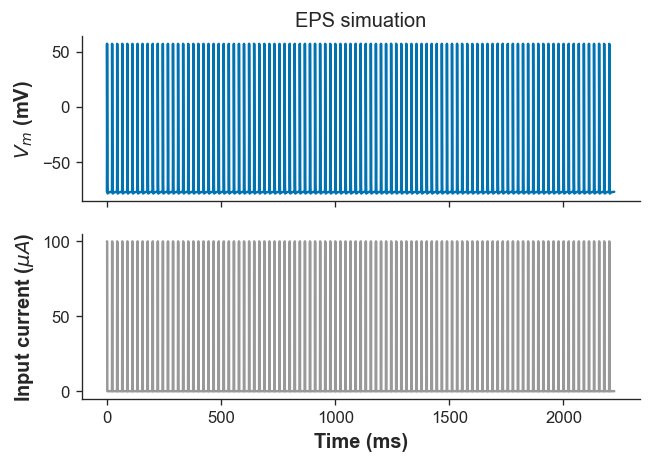

In [5]:
t_sim = np.arange(0., (n_inputs/f_input)*1e3, 0.001)
iArr = [m2.y_fun(k) for k in t1]
fig, ax = plt.subplots(2,1, sharex=True, dpi = 120)
ax[0].plot(t1, y1[:,0])
ax[1].plot(t1, iArr, color = "0.6")
ax[0].set_ylabel("$V_m$ (mV)")
ax[1].set_ylabel("Input current ($\mu A$)")
ax[1].set_xlabel("Time (ms)")
ax[0].set_title("EPS simuation")
sns.despine()

In [771]:
t1

array([0.00000000e+00, 7.75423847e-03, 1.55084769e-02, 3.10169539e-02,
       4.65254308e-02, 6.20339078e-02, 9.85121447e-02, 1.34990382e-01,
       1.71468619e-01, 2.07946855e-01, 2.38931118e-01, 2.69915381e-01,
       3.00899644e-01, 3.09707395e-01, 3.18515145e-01, 3.27322896e-01,
       3.56354880e-01, 3.85386863e-01, 4.14418846e-01, 4.77183513e-01,
       5.39948180e-01, 5.76517469e-01, 6.02128069e-01, 6.27738669e-01,
       6.46929859e-01, 6.66121049e-01, 6.80645280e-01, 6.95169510e-01,
       7.05964162e-01, 7.16758814e-01, 7.24819839e-01, 7.32880865e-01,
       7.40941891e-01, 7.50780385e-01, 7.51272310e-01, 7.51764235e-01,
       7.52256159e-01, 7.53240009e-01, 7.54223858e-01, 7.55207708e-01,
       7.58847874e-01, 7.62488040e-01, 7.66128206e-01, 7.69768371e-01,
       7.78994311e-01, 7.86027589e-01, 7.93060866e-01, 8.00094144e-01,
       8.07127421e-01, 8.14160699e-01, 8.21193976e-01, 8.28227254e-01,
       8.36539514e-01, 8.44851774e-01, 8.53164035e-01, 8.61476295e-01,
      

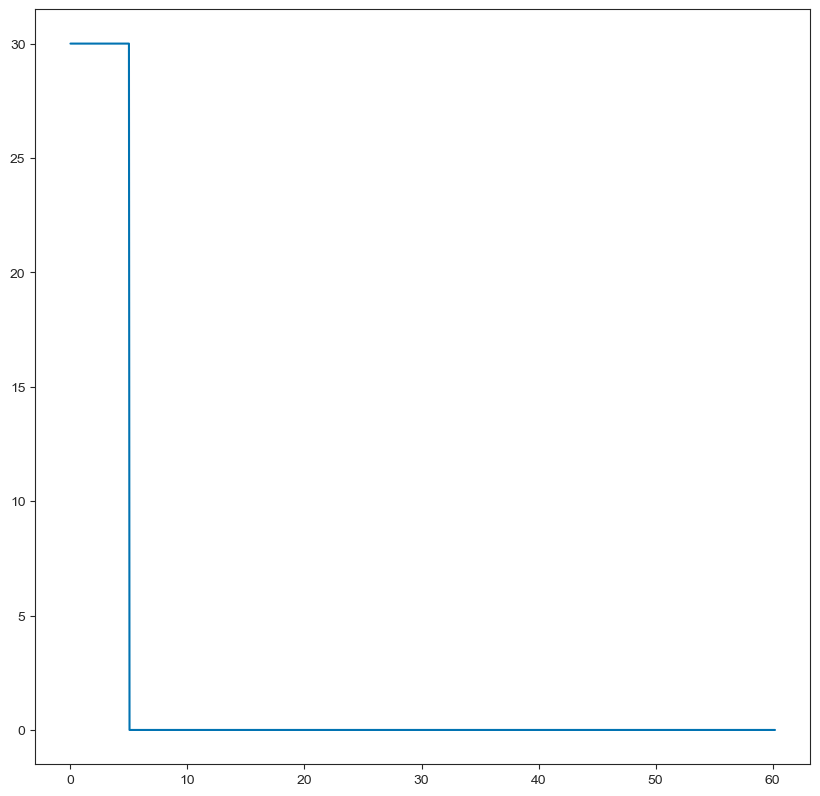

In [745]:
plt.figure(figsize=(10,10))
plt.plot(t1[:200], iArr[:200])

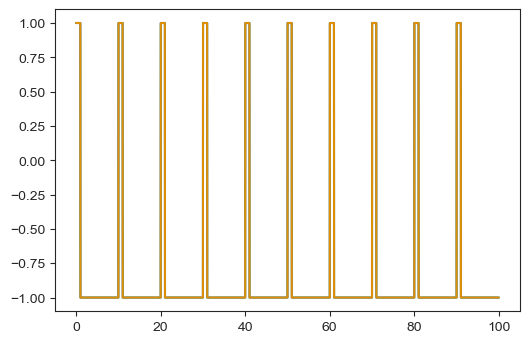

In [761]:
n_inputs = 10
f_input = 100
pulse_width = 1
t_sim = np.arange(0., (n_inputs/f_input)*1e3, 0.001)
y = square(2*np.pi*f_input*t_sim*1e-3, duty=f_input*pulse_width*1e-3)
y_fun = interp1d(t_sim, y)
yArr = [y_fun(k) for k in t_sim]
plt.plot(t_sim, y)
plt.plot(t_sim, yArr)

In [234]:
class Skeletal_muscle:
    """ This class contains the parameters and equations describing dynamics of a skeletal muscle. The class is broken into following parts:
    1. Sarcolemma Model: - Contains ionic currents modeled with Hodgkin-Huxley-like conductance based equations. (UNDER CONSTRUCTION)
    2. Transverse tubule (T-tubule) Model: - Containts the T-tubule ion channels and voltage-gated calcium channels. (UNDER CONSTRUCTION)
    3. Sarcoplasmic Reticulum: - Consists of ryanodine receptors, IP3 receptors and SERCA Pumps. (UNDER CONSTRUCTION)
    4. Mitochondria (UNDER CONSTRUCTION)
    """
    
#     ########################################## Initialization (Under Construction) #################################
#     def __init__(i_step):
#         """This function is used to initialize model parameters and input patterns. For the first iteration of the code, thi"""
    ########################################## defining constants ##################################################
    
    ########### Electrical Parameters
    Cm = 1.                          # μFcm^-2; membrane capacitance
    
    ########### 1. Sodium conductance/channel
    g_max_Na = 804                   # mS.cm^-2; peak sodium conductance
    E_Na = 59.3                      # mV; Sodium channel Nernst Potential
    α_max_m = 0.288                  # (ms.mV)^-1; Maximum forward rate constant for m
    β_max_m = 1.38                   # ms^-1; Maximum backward rate constant for m
    α_max_h = 0.0081                 # ms^-1; Maximum forward rate constant for h
    β_max_h = 0.067                  # ms^-1; Maximum backward rate constant for h
    V_half_m = -46                   # mV; Half-maximum voltage for m
    K_alpha_m = 10                   # ms^-1; Steepness factor for m
    K_beta_m = 18                    # ms^-1: Slope factor for m
    V_half_h = -45                   # mV; Half-maximum voltage for h
    K_alpha_h = 14.7                 # (ms.mV)^-1; Steepness factor for h
    K_beta_h = 9                     # ms^-1; Slope factor for h
    V_half_S = -78                   # mV; Half-maximal voltage for S
    A_S = 5.8                        # mV; Steepness factorfor S
    V_tau = 90                       # Half-maximum voltage for τ_s
    
    ########## 2. Potassium conductance/channel
    g_max_K = 64.8                   # mS.cm^-2; peak potassium conductance
    E_K = -81.8                      # mV; Potassium channel Nernst Potential
    α_max_n = 0.0131                 # (ms.mV)^-1; Maximum forward rate constant for n
    β_max_n = 0.067                  # ms^-1; Maximum backward rate constant for n
    V_half_n = -40                   # mV; Half-maximum voltage for n
    K_alpha_n = 7                    # mV; steepness factor for n
    K_beta_n = 40                    # mV; Slope factor for n
    V_half_hk = -40                  # mV; Half-maximum voltage for hk
    A_hk = 7.5                       # mV; Steepness factor for hk
    
    ######### 3. Chloride conductance/channel
    g_max_Cl = 19.65                 # mS.cm^-2; Maximum conductance of Cl- channel
    E_Cl = -78.3                     # mV; Potassium channel Nernst Potential
    V_half_a = 70                    # mV; Half-maximum voltage for a
    A_a = 150                        # mV; Steepness factor for a
    
    
    
    
    ##################################### Functions ##############################################################
    def na_gating_vars(self, V):
        """This function takes the membrane voltage as input and returns α_m, β_m, α_h and β_h. Functions taken from Senneff and Lowrey 2020."""
    
        a_m = (self.α_max_m*(V - self.V_half_m))/(1 - np.exp((-(V - self.V_half_m))/(self.K_alpha_m)))
        b_m = self.β_max_m*np.exp(-(V - self.V_half_m)/(self.K_beta_m))
        a_h = self.α_max_h*np.exp(-(V - self.V_half_h)/(self.K_beta_h))
        b_h = (self.β_max_h)/(1 + np.exp(-(V - self.V_half_h)/(self.K_beta_h)))
        
        return a_m, b_m, a_h, b_h
    
    def na_slow_inactivation_vars(self, V):
        """This function takes membrane voltage as input and returns S_inf and τ_S variables of the sodium channel slow inactivation."""

        S_inf = 1/(1 + np.exp((V - self.V_half_S)/(self.A_S)))
        tau_S = (60)/(0.2 + 5.56*(np.power((V + self.V_tau), 2)/(100)))

        return S_inf, tau_S
    
    def k_gating_vars(self, V):
        """This function takes membrane voltage as input and returns α_n and β_n (Potassium gating variables). Functions taken from Senneff and Lowrey 2020."""
        a_n = (self.α_max_n*(V - self.V_half_n))/(1 - np.exp(-(V - self.V_half_n)/(self.K_alpha_n)))
        b_n = self.β_max_n*np.exp(-(V - self.V_half_n)/(self.K_beta_n))
        
        return a_n, b_n
    
    def h_K_inf(self, V):
        """This function takes membrane voltage V as input and returns h_K_inf parameter for slow K channel inactivation. Functions taken from Senneff and Lowrey 2020."""
        return 1/(1 + np.exp((V - self.V_half_hk)/(self.A_hk)))
    
    def tau_h_K(self, V):
        """This function takes membrane voltage V as input and returns the time constant τ_hK for K-channel slow inactivation"""
        return np.exp(-(V + 40)/25.75)
    
    def A_boltzmann(self, V):
        """This function takes membrane voltage V as input and returns the Boltzmann-function for activation of Cl- channel"""
        return 1/(1 + np.exp((V - self.V_half_a)/(self.A_a)))
    
    def I_Na(self, V, m, h, S):
        """Sodium current. Inputs: membrane potential (V) (in mV), activation variable (m), inactivation variable (h), slow-inactivation (S)
        Output: magnitude of sodium current (μA)"""
        
        return self.g_max_Na*np.power(m,3)*h*S*(V - self.E_Na)
    
    def I_Kdr(self, V, n, hk):
        """Potassium current. Inputs: membrane potential (V) (in mV), activation variable (n), slow inactivation (hk)
        Outputs: magnitude of potassium current (μA)"""
        
        return self.g_max_K*np.power(n,4)*hk*(V - self.E_K)
    
    def I_Cl(self, V):
        """Chloride current. Inputs: membrane potential (V) (in mV)
        Outputs: magnitude of chloride current (μA)"""
        
        A = self.A_boltzmann(V)
        
        return self.g_max_Cl*np.power(A,4)*(V - self.E_Cl)
    
    def I_pulse(self,t, i):
        """UNDER CONSTRUCTION: Current pulse between 50 - 100 ms"""
        return i if 50<t<100 else 0
    
    def dXdt(self, t, X):
        """Skeletal muscle excitation model containing Hodgkin-Huxley-style differential equations"""
        # unpacking the state-vector
        V, m, h, S, n, hk = X 
        
        # Voltage-dependent kinetic rates for sodium channel
        am, bm, ah, bh = self.na_gating_vars(V)
        
        # Voltage-dependent slow-inactivation parameters for sodium channel
        S_inf, tau_S = self.na_slow_inactivation_vars(V)
        
        # Voltage-dependent reaction kinetic rates for potassium channel
        an, bn = self.k_gating_vars(V)
        
        ## selecting the input-type
        if self.input_type == "pulse":
            I_in = self.I_pulse(t, self.i_inj)
        
        # Hodgkin-Huxley equation
        dV_dt = (1/self.Cm)*(-self.I_Na(V, m, h, S) - self.I_Kdr(V, n, hk) - self.I_Cl(V) + I_in)
        
        # Sodium channel kinetics
        ## activation
        dm_dt = am*(1 - m) - bm*m
        
        ## inactivation
        dh_dt = ah*(1 - h) - bh*h
        
        ## slow-inactivation
        dS_dt = (S_inf - S)/tau_S
        
        # Potassium channel kinetics
        ## activation
        dn_dt = an*(1 - n) - bn*n
        
        ## slow-inactivation
        dhk_dt = (self.h_K_inf(V) - hk)/self.tau_h_K(V)
        
        return [dV_dt, dm_dt, dh_dt, dS_dt, dn_dt, dhk_dt]
    
    def sim_pulse(self, i_inj):
        """Simulates the muscle model for a pulse of amplitude i_inj"""
        # set the input type
        self.input_type = "pulse"
        
        # simulating the model in absence of inputs to get steady state
        ## set input to zero
        self.i_inj = 0.
        ## initial conditions
        X_init = [self.E_Cl+5., 0.001, 0.001, 0.001, 0.001, 0.001]
        ## initiating time vector for 1000 ms with Δt = 0.1 ms
        t_init = np.arange(0., 100., 0.1) 
        ## solving the model in absence of inputs
        sol_init = solve_ivp(self.dXdt, [0, t_init[-1]], X_init, method="LSODA")
        
        # simulating the model for a current pulse of amplitude i_inj and width = 50 ms
        ## set input to user-defined value
        self.i_inj = np.float64(i_inj)
        ## use the steady state values as initial conditions
        X_init = sol_init.y.T[-1,:]
        ## stop time
        t_final = 200 #ms
        ## solving the model for pulse input
        sol = solve_ivp(self.dXdt, [0, t_final], X_init, method="LSODA")
        
        
        return sol.t, sol.y, sol_init.t, sol_init.y
    
        

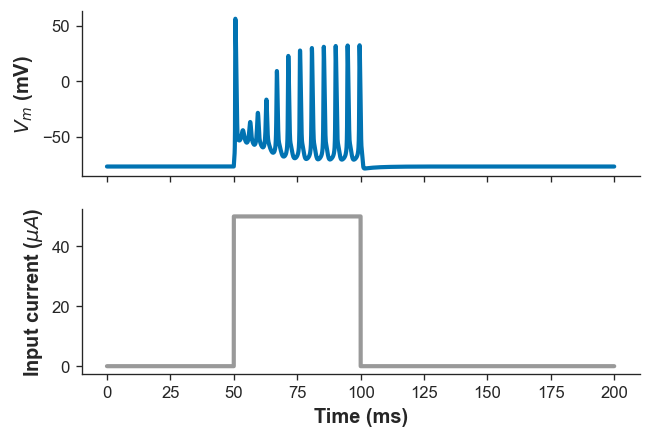

In [617]:
iArr = [m1.I_pulse(k, i_inj) for k in t1]
fig, ax = plt.subplots(2,1, sharex=True, dpi = 120)
ax[0].plot(t1, y1[:,0], lw = 2.5)
ax[1].plot(t, iArr, lw = 2.5, color="0.6")
ax[0].set_ylabel("$V_m$ (mV)")
ax[1].set_ylabel("Input current ($\mu A$)")
ax[1].set_xlabel("Time (ms)")
sns.despine()

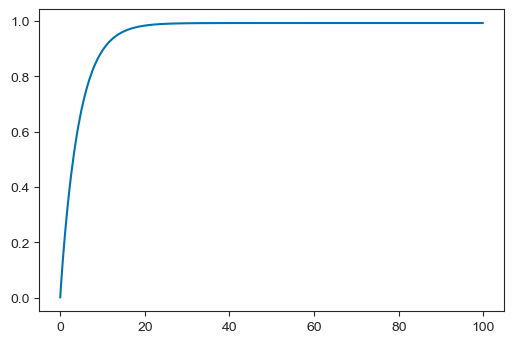

In [574]:
plt.plot(t0, y0.T[:,-1])

In [598]:
# def toy_eps(f, t_end, pulse_width):
#     t_pulse = [i/f for i in range(t_end)]
    
#     y = []
#     t = np.arange(0, t_pulse[-1], 0.001)
    
#     for tip in t_pulse:
#         if tip == t:
#             j = 0
#             while j<pulse_width:
#                 y.append(1)
#                 j = j + 1
#         else:
#             y.append(0)
#     return y

def toy_eps(f, pulse_width, t):
    y = square(t, duty=f*pulse_width*1e-3)
    y_fun = interp1d(t, y)
    return y_fun
    

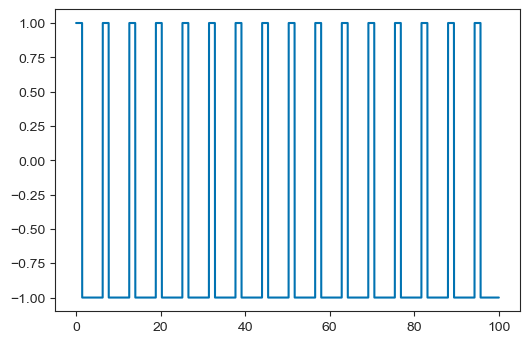

In [602]:
t = np.arange(0., 100., 0.001)
y = toy_eps(45, 5, t)
yArr = [y(k) for k in t]
plt.plot(t,yArr)

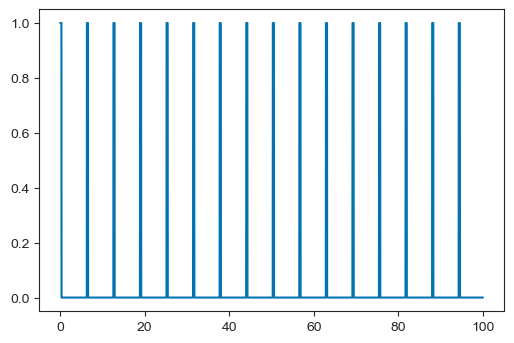

In [597]:
y = square(t,45*1e-3)
plt.plot(t,(y+1)/2)

In [567]:
#### Adding DHPRs
## Global Parameters
F = 96485.3                         # C/mol; Faraday Constant 
R = 8.3145                          # J/(K mol); Gas Constant
Z_Ca = 2                            # (dimensionless); valence of Ca2+
Z_uni = 1                           # (dimensionlessa); valence of unicharged ions

class Skeletal_muscle:
    """ This class contains the parameters and equations describing dynamics of a skeletal muscle. The class is broken into following parts:
    1. Sarcolemma Model: - Contains ionic currents modeled with Hodgkin-Huxley-like conductance based equations. (UNDER CONSTRUCTION)
    2. Transverse tubule (T-tubule) Model: - Containts the T-tubule ion channels and voltage-gated calcium channels. (UNDER CONSTRUCTION)
    3. Sarcoplasmic Reticulum: - Consists of ryanodine receptors, IP3 receptors and SERCA Pumps. (UNDER CONSTRUCTION)
    4. Mitochondria (UNDER CONSTRUCTION)
    """
    
#     ########################################## Initialization (Under Construction) #################################
#     def __init__(i_step):
#         """This function is used to initialize model parameters and input patterns. For the first iteration of the code, thi"""
    ########################################## defining constants ##################################################
    
    ########### Electrical Parameters
    Cm = 1.                          # μFcm^-2; membrane capacitance
    
    ########## Geometric parameters
    Vol = 3500e-18                   # m^3; From Gabella 1976
    A_surface = 5300e-12             # m^2; From Gabella 1976            
    
    ########### 1. Sodium conductance/channel
    g_max_Na = 804                   # mS.cm^-2; peak sodium conductance
    E_Na = 59.3                      # mV; Sodium channel Nernst Potential
    α_max_m = 0.288                  # (ms.mV)^-1; Maximum forward rate constant for m
    β_max_m = 1.38                   # ms^-1; Maximum backward rate constant for m
    α_max_h = 0.0081                 # ms^-1; Maximum forward rate constant for h
    β_max_h = 0.067                  # ms^-1; Maximum backward rate constant for h
    V_half_m = -46                   # mV; Half-maximum voltage for m
    K_alpha_m = 10                   # ms^-1; Steepness factor for m
    K_beta_m = 18                    # ms^-1: Slope factor for m
    V_half_h = -45                   # mV; Half-maximum voltage for h
    K_alpha_h = 14.7                 # (ms.mV)^-1; Steepness factor for h
    K_beta_h = 9                     # ms^-1; Slope factor for h
    V_half_S = -78                   # mV; Half-maximal voltage for S
    A_S = 5.8                        # mV; Steepness factorfor S
    V_tau = 90                       # Half-maximum voltage for τ_s
    
    ########## 2. Potassium conductance/channel
    g_max_K = 64.8                   # mS.cm^-2; peak potassium conductance
    E_K = -81.8                      # mV; Potassium channel Nernst Potential
    α_max_n = 0.0131                 # (ms.mV)^-1; Maximum forward rate constant for n
    β_max_n = 0.067                  # ms^-1; Maximum backward rate constant for n
    V_half_n = -40                   # mV; Half-maximum voltage for n
    K_alpha_n = 7                    # mV; steepness factor for n
    K_beta_n = 40                    # mV; Slope factor for n
    V_half_hk = -40                  # mV; Half-maximum voltage for hk
    A_hk = 7.5                       # mV; Steepness factor for hk
    
    ######### 3. Chloride conductance/channel
    g_max_Cl = 19.65                 # mS.cm^-2; Maximum conductance of Cl- channel
    E_Cl = -78.3                     # mV; Potassium channel Nernst Potential
    V_half_a = 70                    # mV; Half-maximum voltage for a
    A_a = 150                        # mV; Steepness factor for a
    
    ######### 4. DHPR parameters
    kl = 2e-3                        # ms^-1; Rate constant for RyR activation               
    klm = 1e3                        # ms^-1; Rate constant for RyR inactivation
    Kf = 1                           # μM; scaling constant for time constant (papar does NOT mention this... Look at the authors' code)
    K = 4.5                          # mV; Activation rate constant for DHPR
    α_1 = 0.2                        # ms^-1; Activation rate 
    V_bar = -20                      # mV; (paper has messed up the definition but it's the activation voltage for DHPR)
    g_max_Ca = 9.4                   # mScm^-2; peak DHPR calcium conductance
    ca_ext = 1.3e-3                   # μM; extracellular calcium concentration
    ca_int_0 = 0.1e-6                   # μM; resting intracellular calcium
    E_Ca = R*(310)*np.log(ca_ext/ca_int_0)*1e3/(Z_Ca*F) # mV; Nernst potential for calcium ions
    τ_ca = 1e-6                     # s; time-constant for intracellular calcium to return to resting state (open parameter) 

    
    ##################################### Functions ##############################################################
    def na_gating_vars(self, V):
        """This function takes the membrane voltage as input and returns α_m, β_m, α_h and β_h. Functions taken from Senneff and Lowrey 2020."""
    
        a_m = (self.α_max_m*(V - self.V_half_m))/(1 - np.exp((-(V - self.V_half_m))/(self.K_alpha_m)))
        b_m = self.β_max_m*np.exp(-(V - self.V_half_m)/(self.K_beta_m))
        a_h = self.α_max_h*np.exp(-(V - self.V_half_h)/(self.K_beta_h))
        b_h = (self.β_max_h)/(1 + np.exp(-(V - self.V_half_h)/(self.K_beta_h)))
        
        return a_m, b_m, a_h, b_h
    
    def na_slow_inactivation_vars(self, V):
        """This function takes membrane voltage as input and returns S_inf and τ_S variables of the sodium channel slow inactivation."""

        S_inf = 1/(1 + np.exp((V - self.V_half_S)/(self.A_S)))
        tau_S = (60)/(0.2 + 5.56*(np.power((V + self.V_tau), 2)/(100)))

        return S_inf, tau_S
    
    def k_gating_vars(self, V):
        """This function takes membrane voltage as input and returns α_n and β_n (Potassium gating variables). Functions taken from Senneff and Lowrey 2020."""
        a_n = (self.α_max_n*(V - self.V_half_n))/(1 - np.exp(-(V - self.V_half_n)/(self.K_alpha_n)))
        b_n = self.β_max_n*np.exp(-(V - self.V_half_n)/(self.K_beta_n))
        
        return a_n, b_n
    
    def h_K_inf(self, V):
        """This function takes membrane voltage V as input and returns h_K_inf parameter for slow K channel inactivation. Functions taken from Senneff and Lowrey 2020."""
        return 1/(1 + np.exp((V - self.V_half_hk)/(self.A_hk)))
    
    def tau_h_K(self, V):
        """This function takes membrane voltage V as input and returns the time constant τ_hK for K-channel slow inactivation"""
        return np.exp(-(V + 40)/25.75)
    
    def A_boltzmann(self, V):
        """This function takes membrane voltage V as input and returns the Boltzmann-function for activation of Cl- channel"""
        return 1/(1 + np.exp((V - self.V_half_a)/(self.A_a)))
    
    def I_Na(self, V, m, h, S):
        """Sodium current. Inputs: membrane potential (V) (in mV), activation variable (m), inactivation variable (h), slow-inactivation (S)
        Output: magnitude of sodium current (μA)"""
        
        return self.g_max_Na*np.power(m,3)*h*S*(V - self.E_Na)
    
    def I_Kdr(self, V, n, hk):
        """Potassium current. Inputs: membrane potential (V) (in mV), activation variable (n), slow inactivation (hk)
        Outputs: magnitude of potassium current (μA)"""
        
        return self.g_max_K*np.power(n,4)*hk*(V - self.E_K)
    
    def I_Cl(self, V):
        """Chloride current. Inputs: membrane potential (V) (in mV)
        Outputs: magnitude of chloride current (μA)"""
        
        A = self.A_boltzmann(V)
        
        return self.g_max_Cl*np.power(A,4)*(V - self.E_Cl)
    
    def I_pulse(self,t, i):
        """UNDER CONSTRUCTION: Current pulse between 50 - 100 ms"""
        return i if 50<t<100 else 0
    
    def dXdt(self, t, X):
        """Skeletal muscle excitation model containing Hodgkin-Huxley-style differential equations"""
        # unpacking the state-vector
        V, m, h, S, n, hk, c0_dhpr, c1_dhpr, c2_dhpr, c3_dhpr, o0_dhpr, o1_dhpr, o2_dhpr, o3_dhpr, o4_dhpr, f, ca = X 
        #print(V)
        # Voltage-dependent kinetic rates for sodium channel
        am, bm, ah, bh = self.na_gating_vars(V)
        
        # Voltage-dependent slow-inactivation parameters for sodium channel
        S_inf, tau_S = self.na_slow_inactivation_vars(V)
        
        # Voltage-dependent reaction kinetic rates for potassium channel
        an, bn = self.k_gating_vars(V)
        
        ## selecting the input-type
        if self.input_type == "pulse":
            I_in = self.I_pulse(t, self.i_inj)
        
        # Hodgkin-Huxley equation
        dV_dt = (1/self.Cm)*(-self.I_Na(V, m, h, S) - self.I_Kdr(V, n, hk) - self.I_Cl(V) + I_in)
        
        # Sodium channel kinetics
        ## activation
        dm_dt = am*(1 - m) - bm*m
        
        ## inactivation
        dh_dt = ah*(1 - h) - bh*h
        
        ## slow-inactivation
        dS_dt = (S_inf - S)/tau_S
        
        # Potassium channel kinetics
        ## activation
        dn_dt = an*(1 - n) - bn*n
        
        ## slow-inactivation
        dhk_dt = (self.h_K_inf(V) - hk)/self.tau_h_K(V)
        
        # DHPR kinetics (Refer Ríos 1993, J Gen Physio)
        ## voltage dependent gating kinetic rates
        ### forward
        kc = 0.5*self.α_1*(np.exp((V - self.V_bar)/(8*self.K)))
        ### backward
        kcm = 0.5*self.α_1*(np.exp(-(V - self.V_bar)/(8*self.K)))
        
        ## DHPR closed states
        dc0_dhpr = -(4*kc + self.kl)*c0_dhpr + self.klm*o0_dhpr + kcm*c1_dhpr
        dc1_dhpr = -(3*kc + kcm + self.kl/f)*c1_dhpr + 4*kc*c0_dhpr + self.klm*f*o1_dhpr + 2*kcm*c2_dhpr
        dc2_dhpr = -(2*kc + 2*kcm + self.kl/np.power(f,2))*c2_dhpr + 3*kc*c1_dhpr + self.klm*np.power(f,2)*o2_dhpr + 3*kcm*c3_dhpr
        dc3_dhpr = -(kc + 3*kcm + self.kl/np.power(f,3))*c3_dhpr + 2*kc*c2_dhpr + self.klm*np.power(f,3)*o3_dhpr + 4*kcm*(1 - c0_dhpr - c1_dhpr - c2_dhpr - c3_dhpr  -  o0_dhpr -  o1_dhpr - o2_dhpr - o3_dhpr - o4_dhpr)
        #dc4_dhpr = -(4*kcm + self.kl/np.power(f,4))*c4_dhpr + kc*c3_dhpr + self.klm*o4_dhpr*np.power(f,4)
        ## DHPR open states 
        do0_dhpr = -(self.klm + 4*kc/f)*o0_dhpr + self.kl*c0_dhpr + f*kcm*o1_dhpr
        do1_dhpr = -(f*kcm + self.klm*f + 3*kc/f)*o1_dhpr + 4*kc*o0_dhpr/f + self.kl*c1_dhpr/f + 2*f*kcm*o2_dhpr
        do2_dhpr = -(2*f*kcm + self.klm*np.power(f,2) + 2*kc/f)*o2_dhpr + 3*kc*o1_dhpr/f + self.kl*c2_dhpr/np.power(f,2) + 3*f*kcm*o3_dhpr
        do3_dhpr = -(3*f*kcm + self.klm*np.power(f,3) + kc/f)*o3_dhpr + 2*kc*o2_dhpr/f + self.kl*c3_dhpr/np.power(f,3) + 4*f*kcm*o4_dhpr
        do4_dhpr = -(4*f*kcm + self.klm*np.power(f,4))*o4_dhpr + kc*o3_dhpr/f + self.kl*(1 - c0_dhpr - c1_dhpr - c2_dhpr - c3_dhpr  -  o0_dhpr -  o1_dhpr - o2_dhpr - o3_dhpr - o4_dhpr)/np.power(f,4)
        
        ## DHPR allosteric dynamics
        f_inf = 1/(1 + ca)
        tau_f = 1/(self.α_1*(1 + ca/self.Kf))
        df_dt = (f_inf - f)/tau_f
        #print(ca)
        ## Calcium current (μA)
        I_Ca = self.g_max_Ca*(o0_dhpr + o1_dhpr + o2_dhpr + o3_dhpr + o4_dhpr)*f*(V - self.E_Ca)
        #print(I_Ca)
        #print(o0_dhpr + o1_dhpr + o2_dhpr + o3_dhpr + o4_dhpr)
        ## Calcium dynamics (μM)
        dCa_dt = I_Ca*self.A_surface*1e-6/(2*F*self.Vol) - (ca - self.ca_int_0)/self.τ_ca
        
        ## Adding the Ca2+ current contribution to membrane voltage
        #dV_dt += -(1/self.Cm)*I_Ca*1e-5
        
        
        return [dV_dt, dm_dt, dh_dt, dS_dt, dn_dt, dhk_dt] + [dc0_dhpr, dc1_dhpr, dc2_dhpr, dc3_dhpr, do0_dhpr, do1_dhpr, do2_dhpr, do3_dhpr, do4_dhpr, f] + [dCa_dt]
    
    def sim_pulse(self, i_inj):
        """Simulates the muscle model for a pulse of amplitude i_inj"""
        # set the input type
        self.input_type = "pulse"
        
        # simulating the model in absence of inputs to get steady state
        ## set input to zero
        self.i_inj = 0.
        
        ## initial conditions
        ### voltage
        V_init = [self.E_Cl+5., 0.001, 0.001, 0.001, 0.001, 0.001]
        ### DHPR
        dhpr_init = [1/9]*9 + [0.1] # initialize all 10 states to equal probability + initial condition on f
        ### Calcium
        ca_init = [self.ca_int_0*1e-6]
        X_init = V_init + dhpr_init + ca_init
        
        ## initiating time vector for 1000 ms with Δt = 0.1 ms
        t_init = np.arange(0., 100., 0.1) 
        ## solving the model in absence of inputs
        sol_init = solve_ivp(self.dXdt, [0, t_init[-1]], X_init, t_eval = t_init, method="BDF")
        
        # simulating the model for a current pulse of amplitude i_inj and width = 50 ms
        ## set input to user-defined value
        self.i_inj = np.float64(i_inj)
        
        ## use the steady state values as initial conditions
        X_init = sol_init.y.T[-1,:]
        
        ## stop time
        t_final = 200 #ms
        
        ## solving the model for pulse input
        sol = solve_ivp(self.dXdt, [0, t_final], X_init, method="BDF")
        
        
        return sol.t, sol.y, sol_init.t, sol_init.y
    
        

In [565]:
y.T[:,0]

array([-77.07117069, -77.07117082, -77.07117096, ..., -77.07133552,
       -77.07132691, -77.07132676])

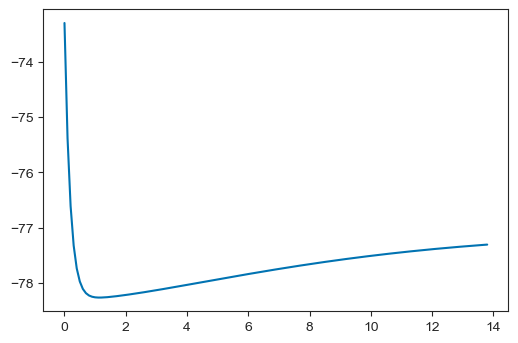

In [509]:
plt.plot(t0, y0.T[:,0])

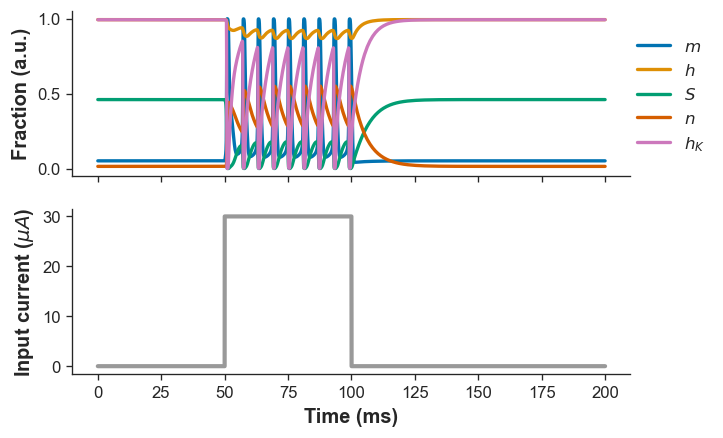

In [208]:
label_list = ["$m$", "$h$", "$S$", "$n$", "$h_K$"]
fig, ax = plt.subplots(2,1, sharex=True, dpi = 120)
for j in np.arange(0,5):
    ax[0].plot(t, y.T[:,j+1], label=label_list[j], lw = 2)
ax[0].set_ylabel("Fraction (a.u.)")
ax[0].legend(frameon=False, loc = (1.,0.1))

ax[1].plot(t, iArr, lw = 2.5, color="0.6")

ax[1].set_ylabel("Input current ($\mu A$)")
ax[1].set_xlabel("Time (ms)")

sns.despine()

In [256]:
y.T[:,0]

array([nan, nan, nan, nan])

Text(0.5, 0, 'Time')

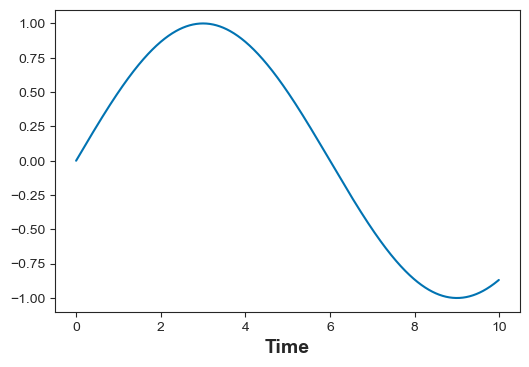

In [50]:
b = np.arange(0., 10., 0.01)
a = np.sin(b*np.pi/6)
sns.lineplot(x=b,y=a)
plt.xlabel(r"Time")

In [59]:
def step(t):
    return 10 if 5<t<7 else 0

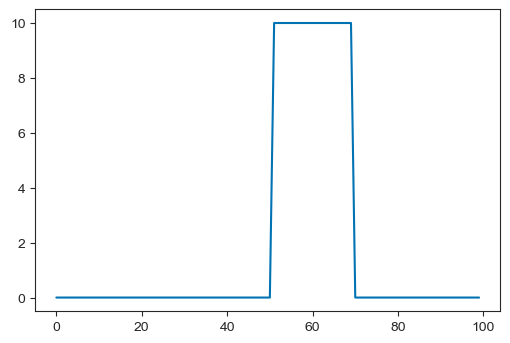

In [61]:
stepArr=[step(k) for k in np.arange(0., 10., 0.1)]
plt.plot(stepArr)

In [477]:
## writing out the code for VGCCs

def dhpr_eqs(t, X):
    c0_dhpr, c1_dhpr, c2_dhpr, c3_dhpr, c4_dhpr, o0_dhpr, o1_dhpr, o2_dhpr, o3_dhpr, f = X
    
    kl = 2e-3
    klm = 1e3
    Kf = 1
    K = 4.5
    alpha1 = 0.2
    
    kc = 0.5*alpha1*(np.exp(-40+20)/(8*K))
    kcm = 0.5*alpha1*(np.exp(-(-40+20))/(8*K))
    
    dc0_dhpr = -(4*kc + kl)*c0_dhpr + klm*o0_dhpr + kcm*c1_dhpr
    dc1_dhpr = -(3*kc + kcm + kl/f)*c1_dhpr + 4*kc*c0_dhpr + klm*f*o1_dhpr + 2*kcm*c2_dhpr
    dc2_dhpr = -(2*kc + 2*kcm + kl/np.power(f,2))*c2_dhpr + 3*kc*c1_dhpr + klm*np.power(f,2)*o2_dhpr + 3*kcm*c3_dhpr
    dc3_dhpr = -(kc + 3*kcm + kl/np.power(f,3))*c3_dhpr + 2*kc*c2_dhpr + klm*np.power(f,3)*o3_dhpr + 4*kcm*c4_dhpr
    dc4_dhpr = -(4*kcm + kl/np.power(f,4))*c4_dhpr + kc*c3_dhpr + klm*(1 - c0_dhpr - c1_dhpr - c2_dhpr - c3_dhpr - c4_dhpr -  o0_dhpr -  o1_dhpr - o2_dhpr - o3_dhpr)*np.power(f,4)
    
    do0_dhpr = -(klm + 4*kc/f)*o0_dhpr + kl*c0_dhpr + f*kcm*o1_dhpr
    do1_dhpr = -(f*kcm + klm*f + 3*kc/f)*o1_dhpr + 4*kc*o0_dhpr/f + kl*c1_dhpr/f + 2*f*kcm*o2_dhpr
    do2_dhpr = -(2*f*kcm + klm*np.power(f,2) + 2*kc/f)*o2_dhpr + 3*kc*o1_dhpr/f + kl*c2_dhpr/np.power(f,2) + 3*f*kcm*o3_dhpr
    do3_dhpr = -(3*f*kcm + klm*np.power(f,3) + kc/f)*o3_dhpr + 2*kc*o2_dhpr/f + kl*c3_dhpr/np.power(f,3) + 4*f*kcm*(1 - c0_dhpr - c1_dhpr - c2_dhpr - c3_dhpr - c4_dhpr -  o0_dhpr -  o1_dhpr - o2_dhpr - o3_dhpr)
    #do4_dhpr = -(4*f*kcm + klm*np.power(f,4))*o4_dhpr + kc*o3_dhpr/f + kl*c4_dhpr/np.power(f,4)
    
    f_inf = 1/(1 + 1e4)
    tau_f = 1/(alpha1*(1 + 1e4/Kf))
    df_dt = (f_inf - f)/tau_f
    
    
    
    return [dc0_dhpr, dc1_dhpr, dc2_dhpr, dc3_dhpr, dc4_dhpr, do0_dhpr, do1_dhpr, do2_dhpr, do3_dhpr, f]

In [478]:
xinit = [1/9]*9 + [0.1]
sol = solve_ivp(dhpr_eqs, [0, 1], xinit, method="LSODA")

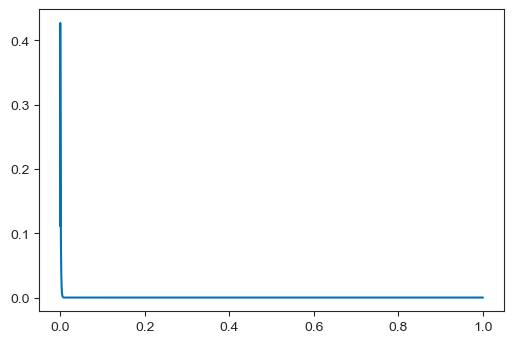

In [480]:
plt.plot(sol.t, sol.y.T[:,-5])

In [229]:
sol.y.T[:,0]

array([0.1       , 0.1008049 , 0.10161628, 0.10520326, 0.10891639,
       0.11275902, 0.11990152, 0.12746669, 0.13544974, 0.14383548,
       0.15575637, 0.16827537, 0.18128599, 0.19467004, 0.20830526,
       0.22207166, 0.2358556 , 0.24955266, 0.26306958, 0.27632522,
       0.29150242, 0.30613203, 0.32014516, 0.33349272, 0.34614257,
       0.35999474, 0.37286914, 0.38477792, 0.39574786, 0.40749177,
       0.41806293, 0.4275425 , 0.43601538, 0.44520194, 0.45314367,
       0.45998828, 0.46587208, 0.47165563, 0.47648428, 0.48050769,
       0.48385462, 0.48717752, 0.48982391, 0.49192856, 0.49360063,
       0.49492806, 0.49624549, 0.49722133, 0.49794427, 0.49847947,
       0.49893173, 0.49924979, 0.4994733 , 0.49963024, 0.49975394,
       0.49983635, 0.49989136, 0.49992799, 0.4999455 , 0.49995863,
       0.49996861, 0.49997271, 0.49997628, 0.49997937, 0.49998225,
       0.49998473, 0.49998686, 0.49999136, 0.4999943 , 0.49999623,
       0.49999825, 0.49999943, 0.49999961, 0.49999965, 0.49999